In [56]:
import os
import matplotlib.pyplot as plt
import numpy as np

import rasterio as rio
import rasterio.plot

In [40]:
folder = "data/satellite/"
img = "test_tulsa_bbox"

In [41]:
fn = os.path.join(folder+img+".tif")

In [42]:
src = rio.open(fn)

In [43]:
src.profile

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 8936, 'height': 4687, 'count': 4, 'crs': CRS.from_epsg(32615), 'transform': Affine(3.0, 0.0, 251559.0,
       0.0, -3.0, 3948906.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}

In [44]:
src.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 0.0,
 'width': 8936,
 'height': 4687,
 'count': 4,
 'crs': CRS.from_epsg(32615),
 'transform': Affine(3.0, 0.0, 251559.0,
        0.0, -3.0, 3948906.0)}

In [58]:
src.crs

CRS.from_epsg(32615)

In [46]:
src.bounds

BoundingBox(left=251559.0, bottom=3934845.0, right=278367.0, top=3948906.0)

In [47]:
src.count #number of bands

4

In [48]:
r = src.read() #band number 1, because there is only one band. If omitted, we get a 3D NumPy array, which we don't want
r

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint16)

In [53]:
r.shape

(4, 4687, 8936)

In [54]:
src.width,src.height

(8936, 4687)

In [51]:
r.dtype

dtype('uint16')

In [78]:
r.mean()

3250.4304797525165

In [67]:
def contrast_stretch(a, dark_percentile=2, bright_percentile=98):
    a_contrast = ( a - np.percentile(a, dark_percentile) ) / ( np.percentile(a, bright_percentile) - np.percentile(a, dark_percentile) )
    a_contrast = np.clip(a_contrast, 0., 1.)
    return a_contrast

In [73]:
r_contrast = np.dstack([contrast_stretch(r[i]) for i in range(4)])
r_contrast.shape

(4687, 8936, 4)

In [88]:
r_vis = r_contrast[:,:,:-1][:,:,::-1]
r_vis.shape

(4687, 8936, 3)

In [ ]:
(arr.min(),arr.mean(),arr.max() for arr in r_vis)

In [59]:
#(1024, 1024, 3)
r_reshaped = np.reshape(r, (src.width,src.height,src.count))
r_reshaped.shape

(8936, 4687, 4)

## Plot the image

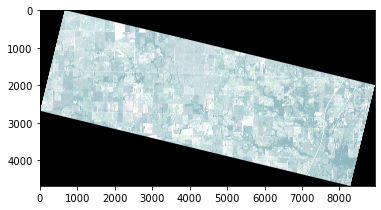

In [89]:
f,ax = plt.subplots()
ax.imshow(r_vis)